In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
# reading the top 5 rows of data
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Since all columns are in numerical type, so no need for numeric conversion while data preparation for feeding in models**

### Exploratory Data Analysis

**Univariate Analysis**

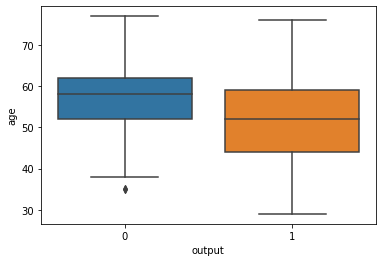

In [6]:
sns.boxplot(data.output,data.age)
plt.show()

The chances of heart attack are more at age group of 45-55

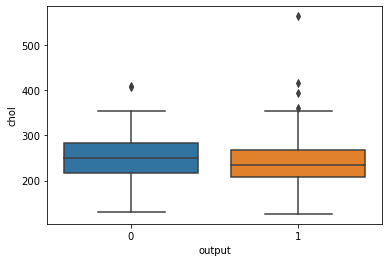

In [7]:
sns.boxplot(data.output,data.chol)
plt.show()

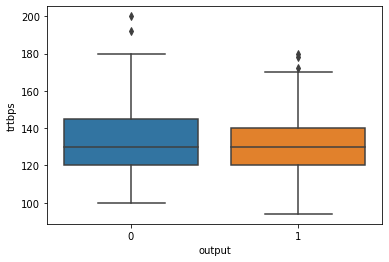

In [8]:
# resting blood pressure (in mm Hg)
sns.boxplot(data.output,data.trtbps)
plt.show()

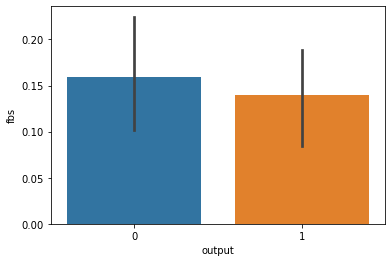

In [9]:
# fasting blood sugar analysis
sns.barplot(data.output,data.fbs)
plt.show()

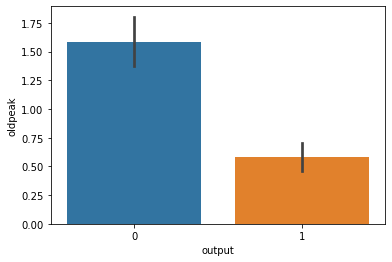

In [10]:
sns.barplot(data.output,data.oldpeak)
plt.show()

For people with less risk of attacks, **oldpeak** can be observed to be high

**Bivariate Analysis**

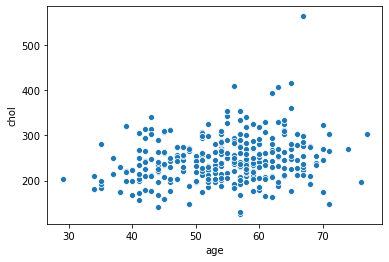

In [11]:
# Age v/s cholesterol level
sns.scatterplot(data.age,data.chol)
plt.show()

relativity of cholesterol level with age is **Positively skewed**

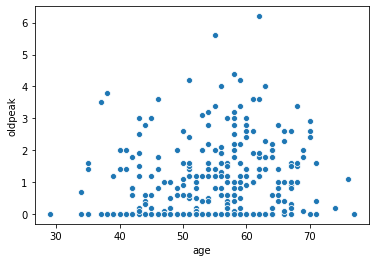

In [12]:
# Age v/s oldpeak level
sns.scatterplot(data.age,data.oldpeak)
plt.show()

with the increase in the age, oldpeak can be seen as rising which in turns supports **"For people with less risk of attacks, oldpeak can be observed to be high"** as observed in the Univariate Analysis of oldpeak v/s age

**Multivariate Analysis**

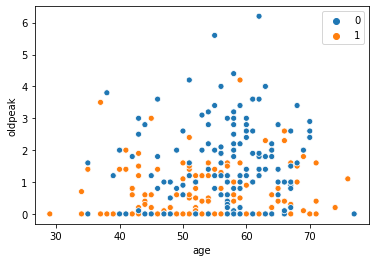

In [13]:
# Age v/s oldpeak level v/s output
sns.scatterplot(data.age,data.oldpeak,hue=list(data.output))
plt.show()

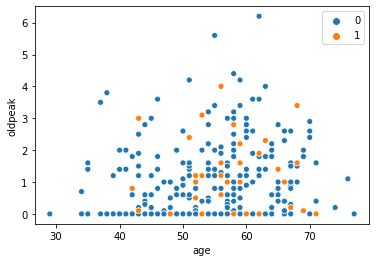

In [14]:
# Age v/s oldpeak level v/s output
sns.scatterplot(data.age,data.oldpeak,hue=list(data.fbs))
plt.show()

Fasting blood sugar is greater for those, who have higher risk of having an attack

### Data Preparation

In [15]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
# Data Scaling
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [17]:
scaler = MinMaxScaler()
trans_vars = ['age','trtbps','chol','restecg','thalachh','oldpeak','slp','caa','thall','output']
data[trans_vars] = scaler.fit_transform(data[trans_vars])

In [18]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.966997,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,1.032052,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,1.000000,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_train,df_test = train_test_split(data,train_size=0.8,random_state=53)

In [20]:
y_train = df_train.pop('output')
X_train = df_train

In [21]:
y_test = df_test.pop('output')
X_test = df_test

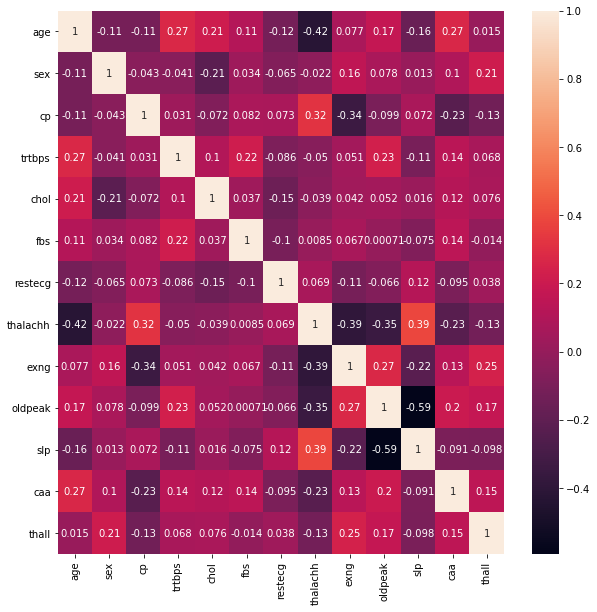

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

Building first model without Feature selection or Dimensionality Reduction

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [24]:
imp_vars = pd.DataFrame()
imp_vars['name'] = X_train.columns
imp_vars['coefficients'] = str(log_reg.coef_).lstrip('[[').rstrip(']]').split()
imp_vars['coefficients'] = imp_vars['coefficients'].astype('float')
imp_vars['coefficients'] = [abs(i) for i in imp_vars['coefficients']]
imp_vars.sort_values('coefficients',ascending=False,inplace=True)
imp_vars

,name,coefficients
11,caa,1.768920
12,thall,1.408143
1,sex,1.359361
9,oldpeak,1.313519
7,thalachh,1.223309
8,exng,1.108162
10,slp,1.019755
3,trtbps,0.967899
2,cp,0.783342
0,age,0.700432


In [25]:
y_train_pred = log_reg.predict(X_train)

In [26]:
confusion_matrix(y_train_pred,y_train)

array([[ 82,  14],
       [ 27, 119]], dtype=int64)

In [27]:
print("accuracy score of train set",accuracy_score(y_train_pred,y_train))

accuracy score of train set 0.8305785123966942


In [28]:
y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test_pred,y_test)

array([[24,  3],
       [ 5, 29]], dtype=int64)

In [29]:
print("accuracy score of test set",accuracy_score(y_test_pred,y_test))

accuracy score of test set 0.8688524590163934


Top 3 important variables
> **`caa`** - number of major vessels<br>
> **`thall`** - maximum heart rate achieved<br>
> **`sex`**

### `Using PCA`

In [30]:
pca = PCA(n_components = 10, random_state = 53)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train))

In [31]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
144,0.979167,0,2,0.433962,0.162100,0,1.0,0.343511,0,0.177419,0.5,0.00,0.666667
291,0.604167,1,0,0.188679,0.438356,0,1.0,0.526718,0,0.709677,0.0,0.75,0.333333
299,0.333333,1,3,0.150943,0.315068,0,0.5,0.465649,0,0.193548,0.5,0.00,1.000000
166,0.791667,1,0,0.245283,0.235160,0,0.0,0.442748,1,0.419355,0.5,0.50,1.000000
108,0.437500,0,1,0.245283,0.269406,0,0.5,0.694656,0,0.177419,1.0,0.00,0.666667


In [32]:
X_test_pca = pd.DataFrame(pca.transform(X_test))

In [33]:
X_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
301,0.583333,1,0,0.339623,0.011416,0,0.5,0.335878,1,0.193548,0.5,0.25,1.000000
280,0.270833,1,0,0.396226,0.431507,0,0.5,0.412214,1,0.290323,0.5,0.00,0.333333
210,0.583333,1,2,0.320755,0.235160,0,0.0,0.603053,0,0.064516,0.5,0.25,1.000000
214,0.562500,1,0,0.292453,0.280822,1,0.0,0.557252,1,0.193548,0.5,0.25,0.666667
241,0.625000,0,0,0.754717,0.280822,0,0.5,0.549618,1,0.000000,0.5,0.00,0.666667


In [34]:
logreg = LogisticRegression()

In [35]:
logreg.fit(X_train_pca,y_train)

LogisticRegression()

In [36]:
y_pred_train = logreg.predict(X_train_pca)

In [37]:
accuracy_score(y_pred_train,y_train)

0.8388429752066116

In [38]:
y_pred_test = logreg.predict(X_test_pca)

In [39]:
accuracy_score(y_pred_test,y_test)

0.8688524590163934

### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dct = DecisionTreeClassifier(max_depth=3,min_samples_split=3,min_samples_leaf=2,criterion='entropy')

In [42]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=3)

In [43]:
y_train_dct = dct.predict(X_train)

In [44]:
accuracy_score(y_train_dct,y_train)

0.8512396694214877

In [45]:
y_test_dct = dct.predict(X_test)

In [46]:
accuracy_score(y_test_dct,y_test)

0.7868852459016393

As it can be seen, the decision tree seems to be overfitting